In [194]:
import pandas as pd
import numpy as np

In [195]:
sales = pd.read_csv('kc_house_data.csv')
train_data = pd.read_csv('kc_house_train_data.csv')
test_data = pd.read_csv('kc_house_test_data.csv')

In [196]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

In [197]:
def get_numpy_data(data, features, output):
    data['constant'] = 1 # add a constant column to an SFrame
    # prepend variable 'constant' to the features list
    features = ['constant'] + features

    # select the columns of data_SFrame given by the ‘features’ list into the SFrame ‘features_sframe’
    features_matrix = data[features].as_matrix(columns=None)

    # this will convert the features_sframe into a numpy matrix with GraphLab Create >= 1.7!!
    # features_matrix = features
    # assign the column of data_sframe associated with the target to the variable ‘output_sarray’

    # this will convert the SArray into a numpy array:
    output_array = data[output].as_matrix(columns=None) # GraphLab Create>= 1.7!!
    return(features_matrix, output_array)

In [198]:
def predict_outcome(feature_matrix, weights):
    predictions = np.dot(feature_matrix, weights)
    return(predictions)

In [199]:
def feature_derivative_ridge(errors, feature, weight, l2_penalty, feature_is_constant):
    if feature_is_constant:
        derivative = 2 * np.dot(feature, errors)
    else:
        derivative = 2 * np.dot(feature, errors) + 2 * l2_penalty * weight
    return derivative

In [200]:
(example_features, example_output) = get_numpy_data(sales, ['sqft_living'], 'price')
my_weights = np.array([1., 10.])
test_predictions = predict_outcome(example_features, my_weights)
errors = test_predictions - example_output # prediction errors

# next two lines should print the same values
print feature_derivative_ridge(errors, example_features[:,1], my_weights[1], 1, False)
print np.sum(errors*example_features[:,1])*2+20.
print ''

# next two lines should print the same values
print feature_derivative_ridge(errors, example_features[:,0], my_weights[0], 1, True)
print np.sum(errors)*2.

-5.6554166816e+13
-5.6554166816e+13

-22446749330.0
-22446749330.0


In [210]:
def ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations=100):
    weights = np.array(initial_weights) # make sure it's a numpy array
    count = 0
    while count < max_iterations:
        #while not reached maximum number of iterations:
        # compute the predictions using your predict_output() function
        predictions = predict_outcome(feature_matrix, weights)

        # compute the errors as predictions - output
        errors = predictions - output
        for i in xrange(len(weights)): # loop over each weight
            # Recall that feature_matrix[:,i] is the feature column associated with weights[i]
            # compute the derivative for weight[i].
            #(Remember: when i=0, you are computing the derivative of the constant!)
            if i == 0:
                derivative = feature_derivative_ridge(errors, feature_matrix[:,i], weights[i], l2_penalty, True)
            else:
                derivative = feature_derivative_ridge(errors, feature_matrix[:,i], weights[i], l2_penalty, False)
            # subtract the step size times the derivative from the current weight 
            weights[i] = weights[i] - step_size * derivative
        count = count + 1;
    return weights

In [211]:
simple_features = ['sqft_living']
my_output = 'price'
(simple_feature_matrix, output) = get_numpy_data(train_data, simple_features, my_output)
(simple_test_feature_matrix, test_output) = get_numpy_data(test_data, simple_features, my_output)

In [212]:
initial_weights = np.array([0.0, 0.0])

In [213]:
simple_feature_matrix

array([[   1, 1180],
       [   1, 2570],
       [   1,  770],
       ..., 
       [   1, 1530],
       [   1, 1600],
       [   1, 1020]])

In [214]:
simple_weights_0_penalty = ridge_regression_gradient_descent(simple_feature_matrix, output, [0.0, 0.0], 1e-12, 0.0, 1000)
simple_weights_0_penalty

array([ -1.63113515e-01,   2.63024369e+02])

In [215]:
simple_weights_high_penalty = ridge_regression_gradient_descent(simple_feature_matrix, output, [0.0, 0.0], 1e-12, 1e11, 1000)
simple_weights_high_penalty

array([   9.76730382,  124.57217567])

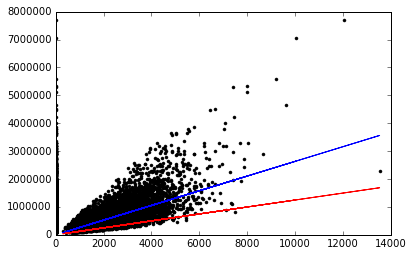

In [216]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(simple_feature_matrix,output,'k.',
        simple_feature_matrix,predict_outcome(simple_feature_matrix, simple_weights_0_penalty),'b-',
        simple_feature_matrix,predict_outcome(simple_feature_matrix, simple_weights_high_penalty),'r-')

In [217]:
simple_weights_high_penalty

array([   9.76730382,  124.57217567])

In [218]:
(simple_test_feature_matrix, test_output) = get_numpy_data(test_data, simple_features, my_output)

In [219]:
test_predictions = predict_outcome(test_simple_feature_matrix, np.array([0.0, 0.0]))

In [220]:
test_predictions2 = predict_outcome(test_simple_feature_matrix, simple_weights_0_penalty)

In [221]:
test_predictions3 = predict_outcome(test_simple_feature_matrix, simple_weights_high_penalty)

In [222]:
print np.sum((test_predictions - test_output) **2)

1.78427328614e+15


In [223]:
print np.sum((test_predictions2 - test_output) **2)

2.75723632154e+14


In [224]:
print np.sum((test_predictions3 - test_output) **2)

6.9464210149e+14


In [225]:
model_features = ['sqft_living', 'sqft_living15']
my_output = 'price'
(feature_matrix, output) = get_numpy_data(train_data, model_features, my_output)
(test_feature_matrix, test_output) = get_numpy_data(test_data, model_features, my_output)

In [226]:
multiple_weights_0_penalty = ridge_regression_gradient_descent(feature_matrix, output, [0.0, 0.0, 0.0], 1e-12, 0.0, 1000)

In [227]:
multiple_weights_high_penalty = ridge_regression_gradient_descent(feature_matrix, output, [0.0, 0.0, 0.0], 1e-12, 1e11, 1000)

In [228]:
test_predictions_mult = predict_outcome(test_feature_matrix, np.array([0, 0, 0]))

In [229]:
test_predictions_mult2 = predict_outcome(test_feature_matrix, multiple_weights_0_penalty)

In [230]:
test_predictions_mult3 = predict_outcome(test_feature_matrix, multiple_weights_high_penalty)

In [231]:
print np.sum((test_predictions_mult - test_output) **2)

1.78427328614e+15


In [232]:
print np.sum((test_predictions_mult2 - test_output) **2)

2.74067615919e+14


In [233]:
print np.sum((test_predictions_mult3 - test_output) **2)

5.00404800501e+14


In [234]:
test_predictions_mult2[0]

387465.47605823533

In [235]:
test_predictions_mult3[0]

270453.53032194055

In [236]:
test_output[0] - test_predictions_mult2[0]

-77465.476058235334

In [237]:
test_output[0] - test_predictions_mult3[0]

39546.469678059453

In [238]:
simple_weights_0_penalty

array([ -1.63113515e-01,   2.63024369e+02])

In [239]:
simple_weights_high_penalty

array([   9.76730382,  124.57217567])

In [240]:
multiple_weights_high_penalty

array([  6.74296579,  91.48927365,  78.43658766])

In [241]:
multiple_weights_0_penalty

array([  -0.35743483,  243.05416982,   22.41481497])